In [29]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
df = pd.read_csv('aapl.csv')
df.tail()




,Date,High,Low,Open,Close,Volume,Adj Close
1318,2011-12-23,14.413929,14.267500,14.274643,14.404643,269399200,12.447616
1319,2011-12-27,14.610357,14.393572,14.396428,14.518929,265076000,12.546378
1320,2011-12-28,14.580358,14.333571,14.531786,14.380000,228662000,12.426320
1321,2011-12-29,14.487500,14.303928,14.407143,14.468572,215978000,12.502859
1322,2011-12-30,14.510000,14.410357,14.411072,14.464286,179662000,12.499158


In [33]:
delta = df['Adj Close'].diff(1)
delta.dropna(inplace = True)

positive = delta.copy()
negative = delta.copy()

positive[positive < 0] = 0
negative[negative > 0] = 0
days = 14


In [35]:
import numpy as np

avg_gain = positive.rolling(window = days).mean()
avg_loss = negative.rolling(window=days).mean()

RS = np.abs(avg_gain / avg_loss)


RSI = (100.0 - (100.0  / (1.0 + RS)))


combined = pd.DataFrame()
combined['Adj Close'] = df['Adj Close']
combined['RSI'] = RSI
combined.RSI

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1318    60.858454
1319    66.009146
1320    63.365521
1321    64.011532
1322    61.669455
Name: RSI, Length: 1323, dtype: float64

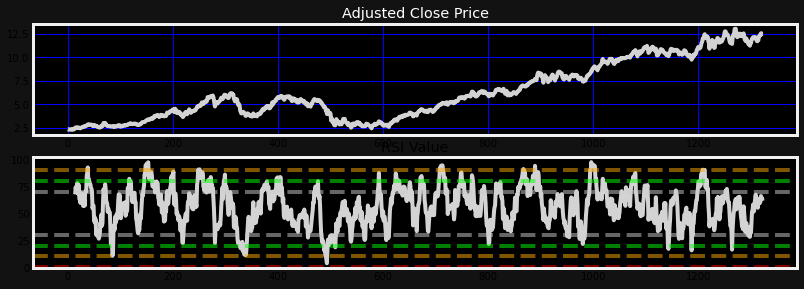

In [36]:
plt.figure(figsize=(12.2, 4.5))
ax1 = plt.subplot(211)
ax1.plot(combined.index, combined['Adj Close'], color = 'lightgrey')
ax1.set_title('Adjusted Close Price', color = 'white')

ax1.grid(True, color = 'blue')
ax1.set_axisbelow(True)
ax1.set_facecolor('black')

ax1.figure.set_facecolor('#121212')
ax1.tick_params(axis = 'x',color = 'white')
ax1.tick_params(axis = 'y', color = 'white')

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(combined.index, combined['RSI'], color = 'lightgrey')
ax2.axhline(0, linestyle = '--', alpha = 0.5, color = '#ff0000')
ax2.axhline(10, linestyle = '--', alpha = 0.5, color = '#ffaa00')
ax2.axhline(20, linestyle = '--', alpha = 0.5, color = '#00ff00')
ax2.axhline(30, linestyle = '--', alpha = 0.5, color = '#cccccc')
ax2.axhline(70, linestyle = '--', alpha = 0.5, color = '#cccccc')
ax2.axhline(80, linestyle = '--', alpha = 0.5, color = '#00ff00')
ax2.axhline(90, linestyle = '--', alpha = 0.5, color = '#ffaa00')

ax2.set_title('RSI Value')
ax2.grid(False)
ax2.set_axisbelow(True)
ax2.set_facecolor('black')

ax2.figure.set_facecolor('#121212')
ax2.tick_params(axis = 'x',color = 'white')
ax2.tick_params(axis = 'y', color = 'white')

plt.show()